In [1]:
## Every notebook should start with this header
# The next lines mean that changes in Python files are instantaneously applied
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from pathlib import Path

# As a sanity check, print out the current working directory
print(f"Running in {Path('').absolute()}")

import cfspopcon
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr
from cfspopcon.unit_handling import magnitude_in_units, ureg

import extended_lengyel
plt.style.use('paper_plots.mplstyle')

Running in /Users/tbody/Projects/extended-lengyel/notebooks


In [2]:
from extended_lengyel.extended_lengyel_model import LengyelModel

def run_lengyel_models(
    model: LengyelModel,
    override_elements = None,
    **overrides,
):
    algorithm = [
        "calc_target_electron_temp_from_cc_fit",
        "calc_magnetic_field_and_safety_factor",
        "calc_fieldline_pitch_at_omp",
        "set_radas_dir",
        "read_atomic_data",
        "set_single_impurity_species",
        "build_CzLINT_for_seed_impurities",
        "calc_kappa_e0",
    ]

    match model:
        case LengyelModel.basic:
            algorithm += [
                "ignore_kappa_z",
                "calc_lambda_q_HD",
                "calc_parallel_heat_flux_density",
                "calc_separatrix_electron_temp_no_broadening",
                "calc_separatrix_total_pressure_LG",
                "calc_required_power_loss_fraction",
                "calc_parallel_heat_flux_at_target_from_power_loss_fraction",
                "run_basic_lengyel_model",
            ]
        case LengyelModel.S_correction:
            algorithm += [
                "ignore_kappa_z",
                "calc_lambda_q_HD",
                "calc_parallel_heat_flux_density",
                "ignore_power_loss_in_convection_layer",
                "ignore_temp_ratio_in_convection_layer",
                "calc_separatrix_electron_temp_with_broadening",
                "calc_separatrix_total_pressure_LG",
                "calc_required_power_loss_fraction",
                "calc_parallel_heat_flux_at_target_from_power_loss_fraction",
                "calc_parallel_heat_flux_from_conv_loss",
                "run_extended_lengyel_model_with_S_correction",
            ]
        case LengyelModel.S_Zeff_and_fconv_correction:
            algorithm += [
                "ignore_kappa_z",
                "calc_lambda_q_HD",
                "calc_parallel_heat_flux_density",
                "build_mean_charge_for_seed_impurities",
                "calc_power_loss_from_cc_fit",
                "calc_power_loss_from_cc_fit",
                "calc_electron_temp_from_cc_fit",
                "run_extended_lengyel_model_with_S_and_Zeff_correction",
            ]
        case LengyelModel.S_Zeff_fconv_and_alpha_t_correction:
            algorithm += [
                "build_mean_charge_for_seed_impurities",
                "calc_momentum_loss_from_cc_fit",
                "calc_power_loss_from_cc_fit",
                "calc_electron_temp_from_cc_fit",
                "run_extended_lengyel_model_with_S_Zeff_and_alphat_correction",
            ]
    
    algorithm += [
        "calc_sound_speed_at_target",
        "calc_target_density",
        "calc_flux_density_to_pascals_factor",
        "calc_parallel_to_perp_factor",
        "calc_ion_flux_to_target",
        "calc_divertor_neutral_pressure",
        "calc_radiative_efficiency",
        "calc_lambda_int_from_lambda_q",
        "calc_qdet_ext_7a",
        "calc_qdet_ext_7b",
        "calc_heat_flux_perp_to_target",
    ]

    algorithm = cfspopcon.CompositeAlgorithm.from_list(algorithm)

    
    ds = xr.Dataset(data_vars=extended_lengyel.read_config(
        elements        = ["base", "machine_geometry", "field_at_omp"] if override_elements is None else override_elements,
        keys            = algorithm.input_keys,
        allowed_missing = algorithm.default_keys,
        overrides       = overrides,
    ))

    algorithm.validate_inputs(ds)

    return algorithm.update_dataset(ds)

In [3]:
Lengyel_results = {
    LengyelModel.basic: "basic",
    LengyelModel.S_correction: "$+\\lambda_{INT}/\\lambda_q$",
    LengyelModel.S_Zeff_and_fconv_correction: "$+f_{conv}+\\kappa_z$",
    LengyelModel.S_Zeff_fconv_and_alpha_t_correction: "$+\\lambda_q(\\alpha_t)$"
}

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)


/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

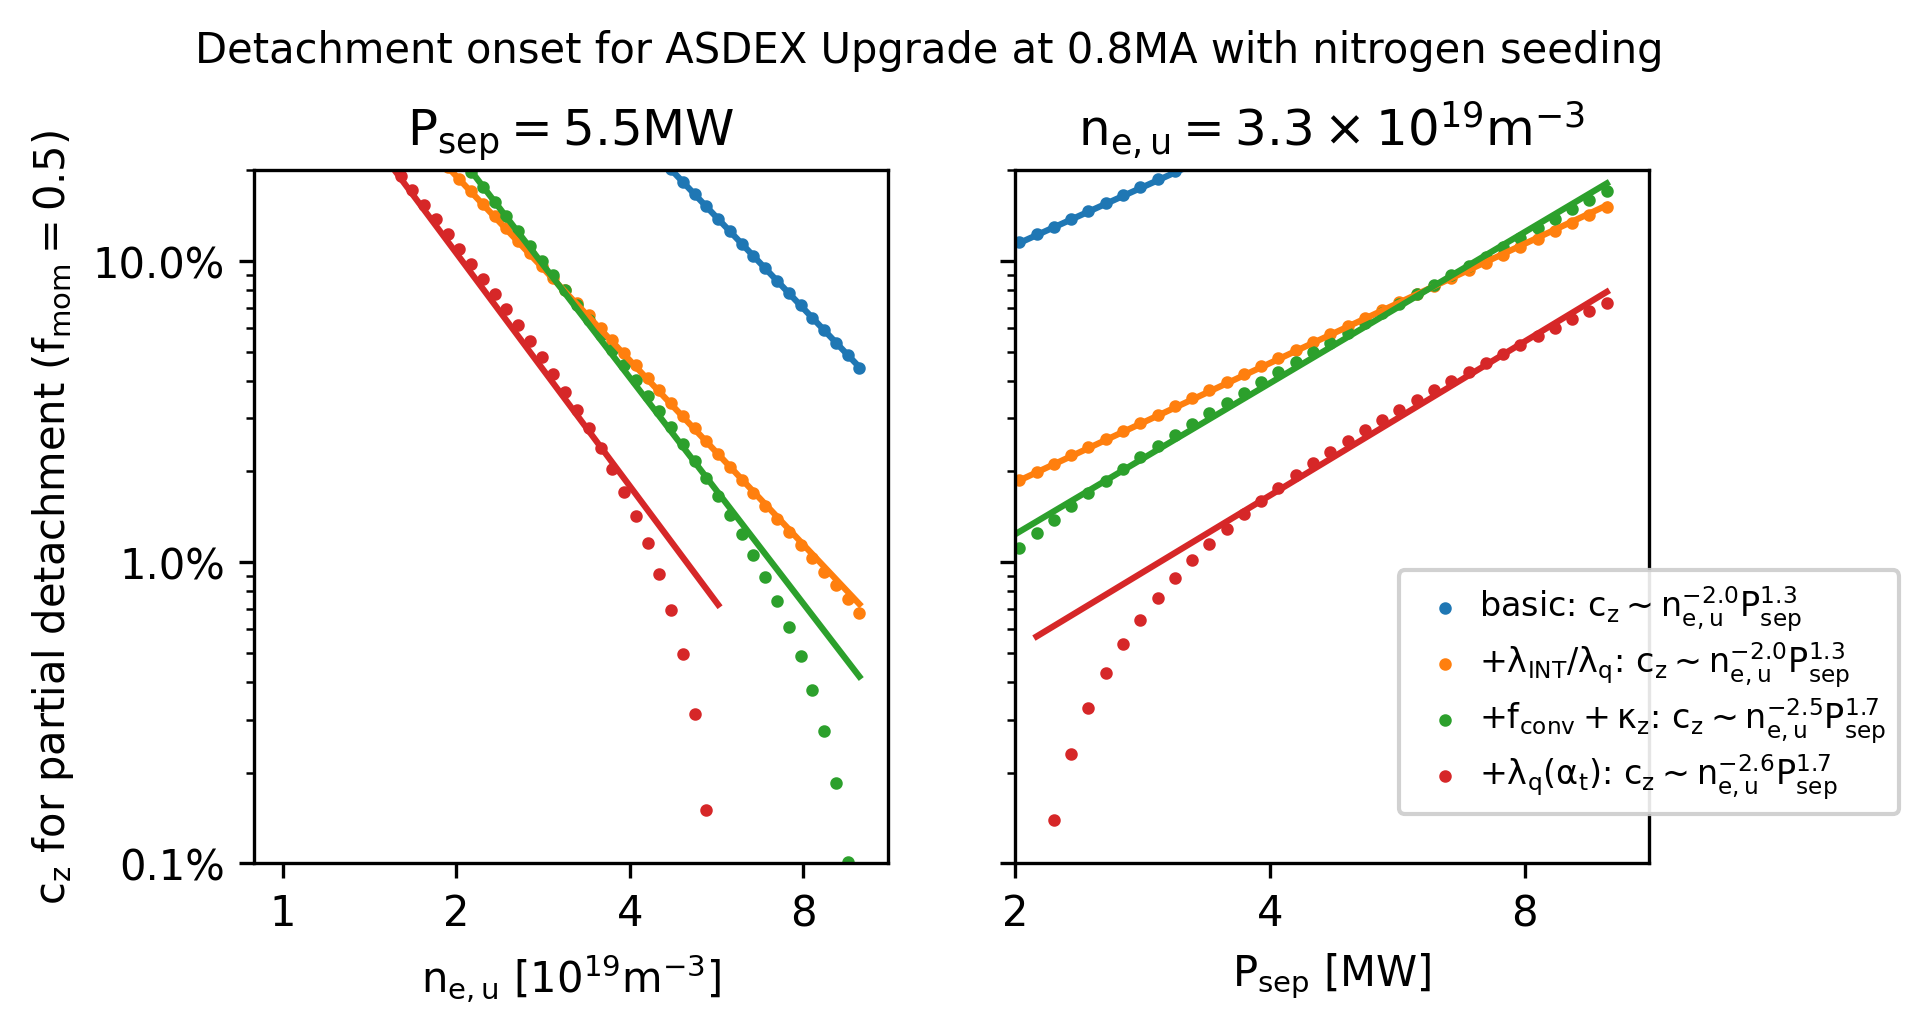

In [4]:
from enum import Enum, auto

class PlotVar(Enum):
    """Enum of possible atomic species."""

    impurity_fraction = auto()
    separatrix_electron_temp = auto()

import matplotlib.ticker as ticker
from cfspopcon.unit_handling import magnitude_in_units as mag

import extended_lengyel.directories

def power_law(x, m, b):
    return np.power(10, b) * np.power(x, m)

def plot_scalings(
    power_crossing_separatrix,
    separatrix_electron_density,
    selected_power_crossing_separatrix = 5.5 * ureg.MW,
    selected_separatrix_electron_density = 3.3 * ureg.n19,
    selected_plasma_current = 0.8 * ureg.MA,
    min_cz_for_fit = 1e-2,
    max_cz_for_fit = 1.0,
    density_units = "n19",
    power_units = "MW",
    density_ticks = [1, 2, 4, 8],
    power_ticks = [2, 4, 8],
    plotvar = PlotVar.impurity_fraction,
    title = "Detachment onset scaling",
    **overrides,
):

    fig, axs = plt.subplots(ncols=2, figsize=(6, 3), sharey=True)

    point_size = 4.0

    for C, (model, label) in enumerate(Lengyel_results.items()):
        
        fixed_power_ds = run_lengyel_models(
            power_crossing_separatrix   = selected_power_crossing_separatrix,
            separatrix_electron_density = separatrix_electron_density,
            model                       = model,
            plasma_current              = selected_plasma_current,
            **overrides,
        )
        fixed_density_ds = run_lengyel_models(
            power_crossing_separatrix   = power_crossing_separatrix,
            separatrix_electron_density = selected_separatrix_electron_density,
            model                       = model,
            plasma_current              = selected_plasma_current,
            **overrides,
        )

        for i, ds in enumerate([fixed_power_ds, fixed_density_ds]):
            
            ax = axs[i]

            if i == 0:
                x = mag(ds["separatrix_electron_density"], density_units)
            elif i == 1:
                x = mag(ds["power_crossing_separatrix"], power_units)

            if plotvar == PlotVar.impurity_fraction:
                y = mag(ds["impurity_fraction"], ureg.dimensionless)
                y_var = "c_z"

            elif plotvar == PlotVar.separatrix_electron_temp:
                y = mag(ds["separatrix_electron_temp"], ureg.eV)
                y_var = "T_{e,u}"

            y = y.broadcast_like(x)

            x = x.where(~np.isnan(y), drop=True)
            y = y.where(~np.isnan(y), drop=True)

            if plotvar == PlotVar.impurity_fraction:
                x_fit = x.where((y > min_cz_for_fit) & (y < max_cz_for_fit), drop=True)
                y_fit = y.where((y > min_cz_for_fit) & (y < max_cz_for_fit), drop=True)
            else:
                x_fit, y_fit = x, y

            if y_fit.size == 0:
                continue

            m, b = np.polyfit(np.log10(x_fit), np.log10(y_fit), 1)

            if i == 0:
                label = f"{label}: ${y_var}\\sim n_{{e,u}}^{{{m:.1f}}}"
                ax.scatter(x, y, s=point_size, c=f"C{C}")
                ax.plot(x, power_law(x, m, b), c=f"C{C}")
            else:
                ax.scatter(x, y, label=f"{label}P_{{sep}}^{{{m:.1f}}}$", s=point_size, c=f"C{C}")
                ax.plot(x, power_law(x, m, b), c=f"C{C}")

    axs[0].set_xlabel("$n_{e,u}$ [$10^{19}m^{-3}$]")
    axs[1].set_xlabel("$P_{sep}$ [$MW$]")
    axs[0].set_ylabel(f"${y_var}$ for partial detachment ($f_{{mom}}=0.5$)")
    axs[0].set_title(f"$P_{{sep}}={mag(selected_power_crossing_separatrix, power_units):.1f}{power_units}$")
    density_exp = density_units[1:]
    axs[1].set_title(f"$n_{{e,u}}={mag(selected_separatrix_electron_density, density_units):.1f}\\times10^{{{density_exp}}}m^{{-3}}$")

    for ax in axs:
        if plotvar == PlotVar.impurity_fraction:
            ax.set_xscale("log")
            ax.set_yscale("log")
            ax.set_xticks([], minor=True)
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.0f"))
            ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
            ax.set_ylim(1e-3, 2e-1)

    plt.figlegend(loc="center",
                fontsize=8,
                labelspacing = 0.2,
                handletextpad=0.0,
                bbox_to_anchor=(0.9, 0.3),
                framealpha=0.9
    )
    axs[0].set_xticks(density_ticks, minor=False)
    axs[1].set_xticks(power_ticks, minor=False)
    axs[1].set_xlim(left=2)

    fig.text(0.5, 1.0, title, ha='center')
    
    return fig

fig = plot_scalings(
    separatrix_electron_density = extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.n19, dims="separatrix_electron_density"),
    power_crossing_separatrix   = extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.MW, dims="power_crossing_separatrix"),
    selected_plasma_current     = 0.8 * ureg.MA,
    title=f"Detachment onset for ASDEX Upgrade at 0.8MA with nitrogen seeding"
)

fig.savefig(extended_lengyel.directories.output_dir / "detachment_onset_scaling.png", dpi=300, bbox_inches="tight")

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

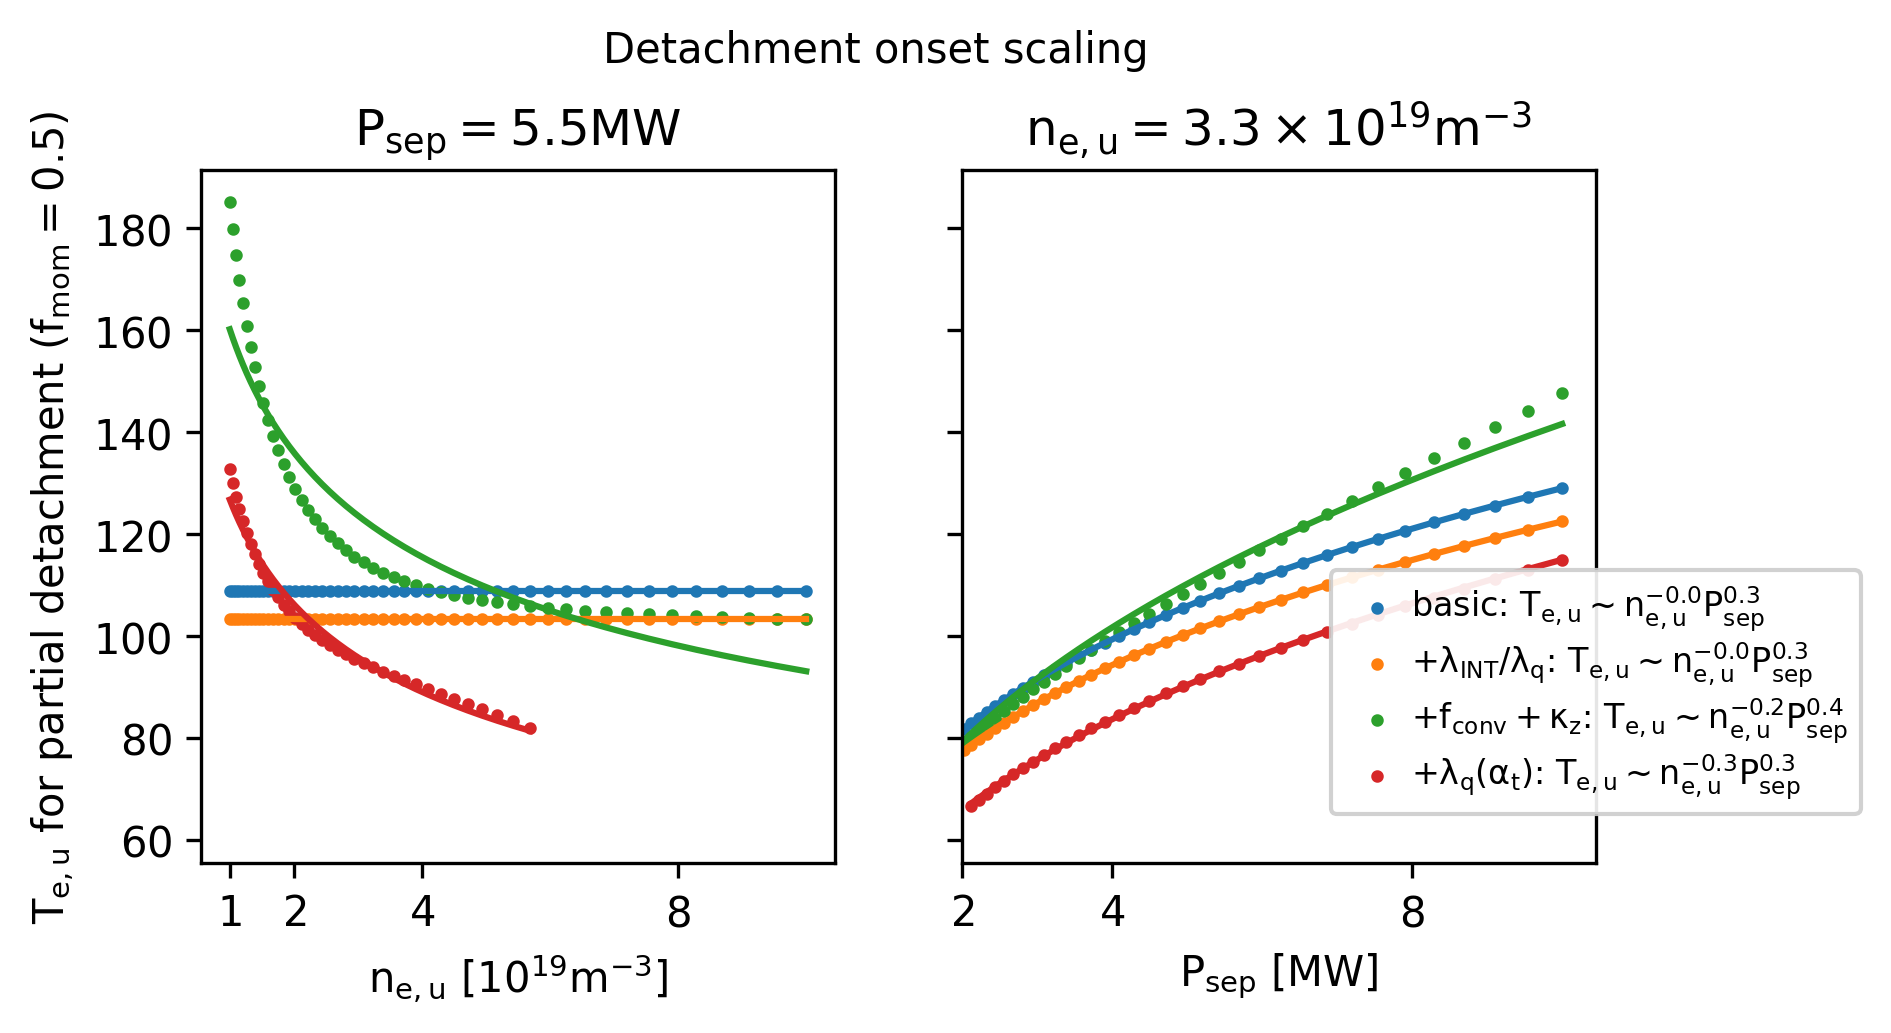

In [5]:
fig = plot_scalings(
    separatrix_electron_density = extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.n19, dims="separatrix_electron_density"),
    power_crossing_separatrix   = extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.MW, dims="power_crossing_separatrix"),
    selected_plasma_current     = 0.8 * ureg.MA,
    plotvar                     = PlotVar.separatrix_electron_temp
)

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)


/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_st

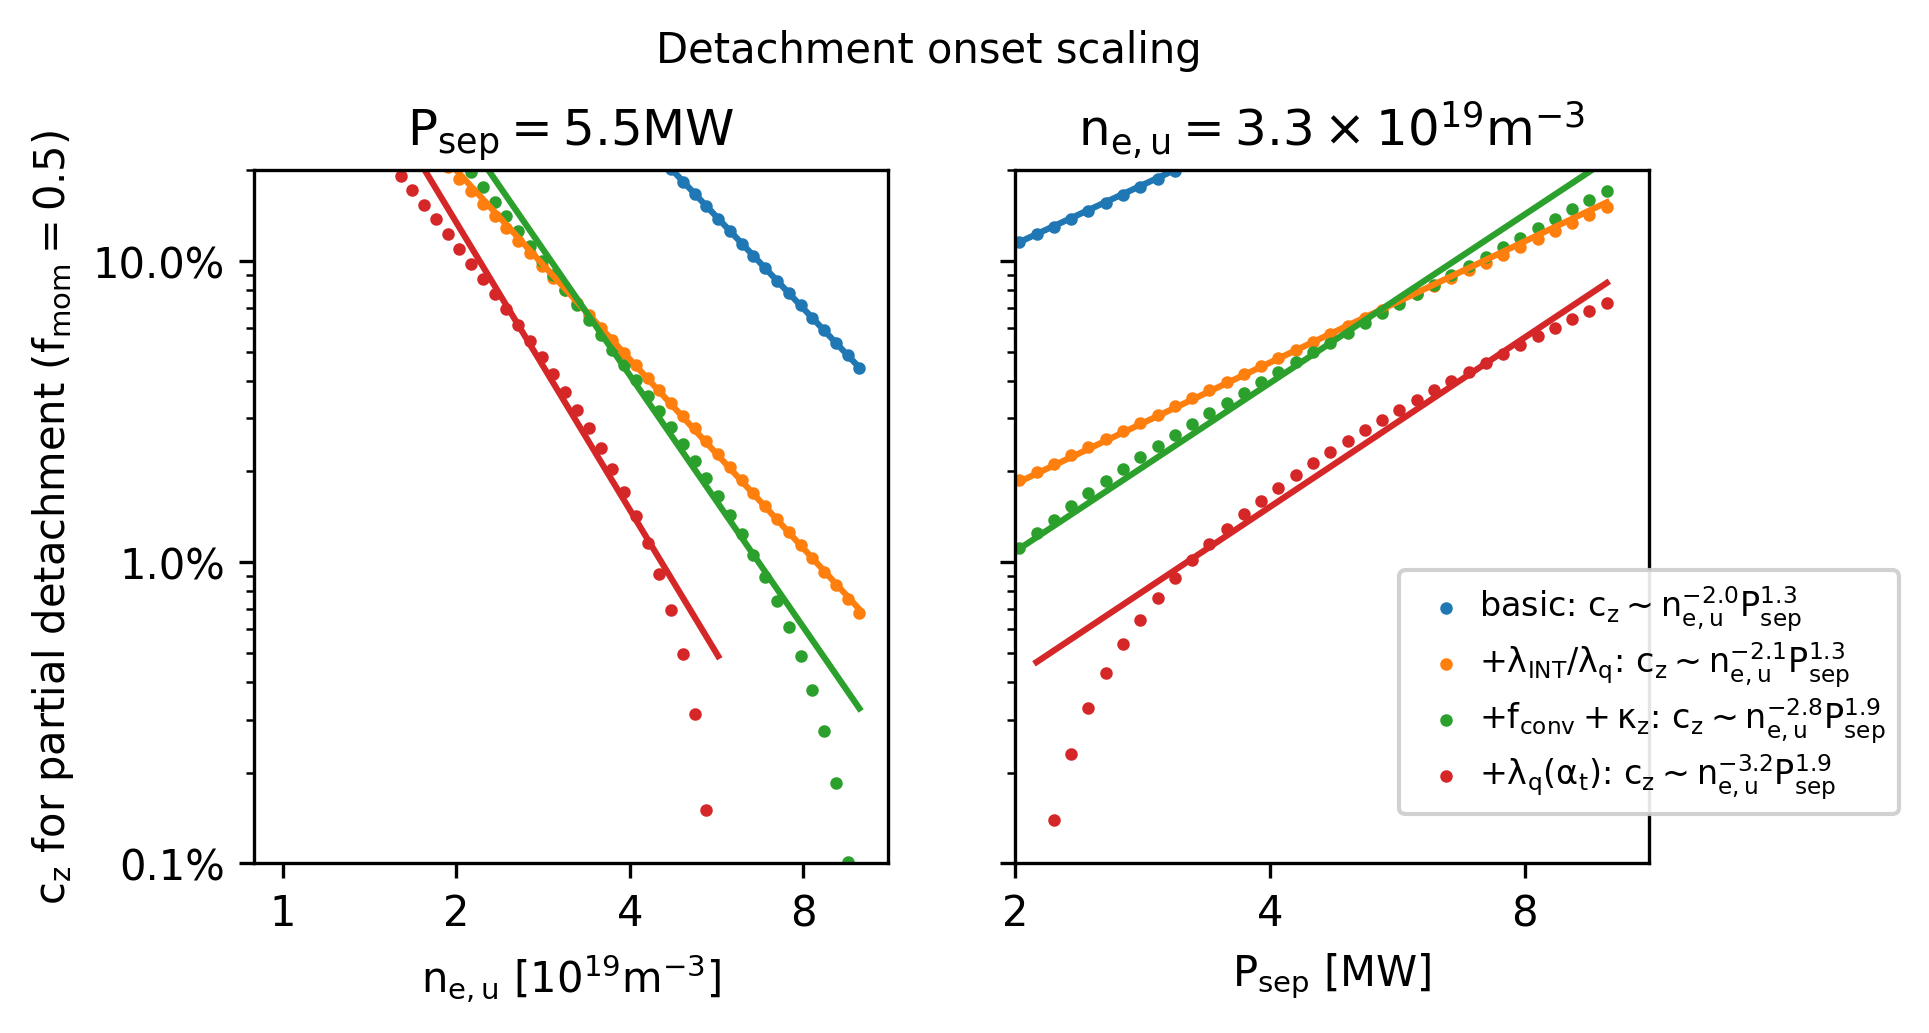

In [6]:
fig = plot_scalings(
    separatrix_electron_density          = extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.n19, dims="separatrix_electron_density"),
    power_crossing_separatrix            = extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.MW, dims="power_crossing_separatrix"),
    selected_plasma_current              = 0.8 * ureg.MA,
    min_cz_for_fit                       = 0.5e-2,
    max_cz_for_fit                       = 1e-1
)

## Why is $c_z$ diverging at low values?

$\lambda_q$ is varying, but not enough to explain the large variation in $c_z$.

/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in mean_charge_state (vectorized)
  outputs = ufunc(*inputs)
/Users/tbody/Projects/extended-lengyel/.venv/lib/python3.12/site-packages/numpy/lib/_function_base_impl.py:2605: RuntimeWarning: invalid value encountered in L_int (vectori

Text(0.5, 0, '$n_{e,u} [n_{19}]$')

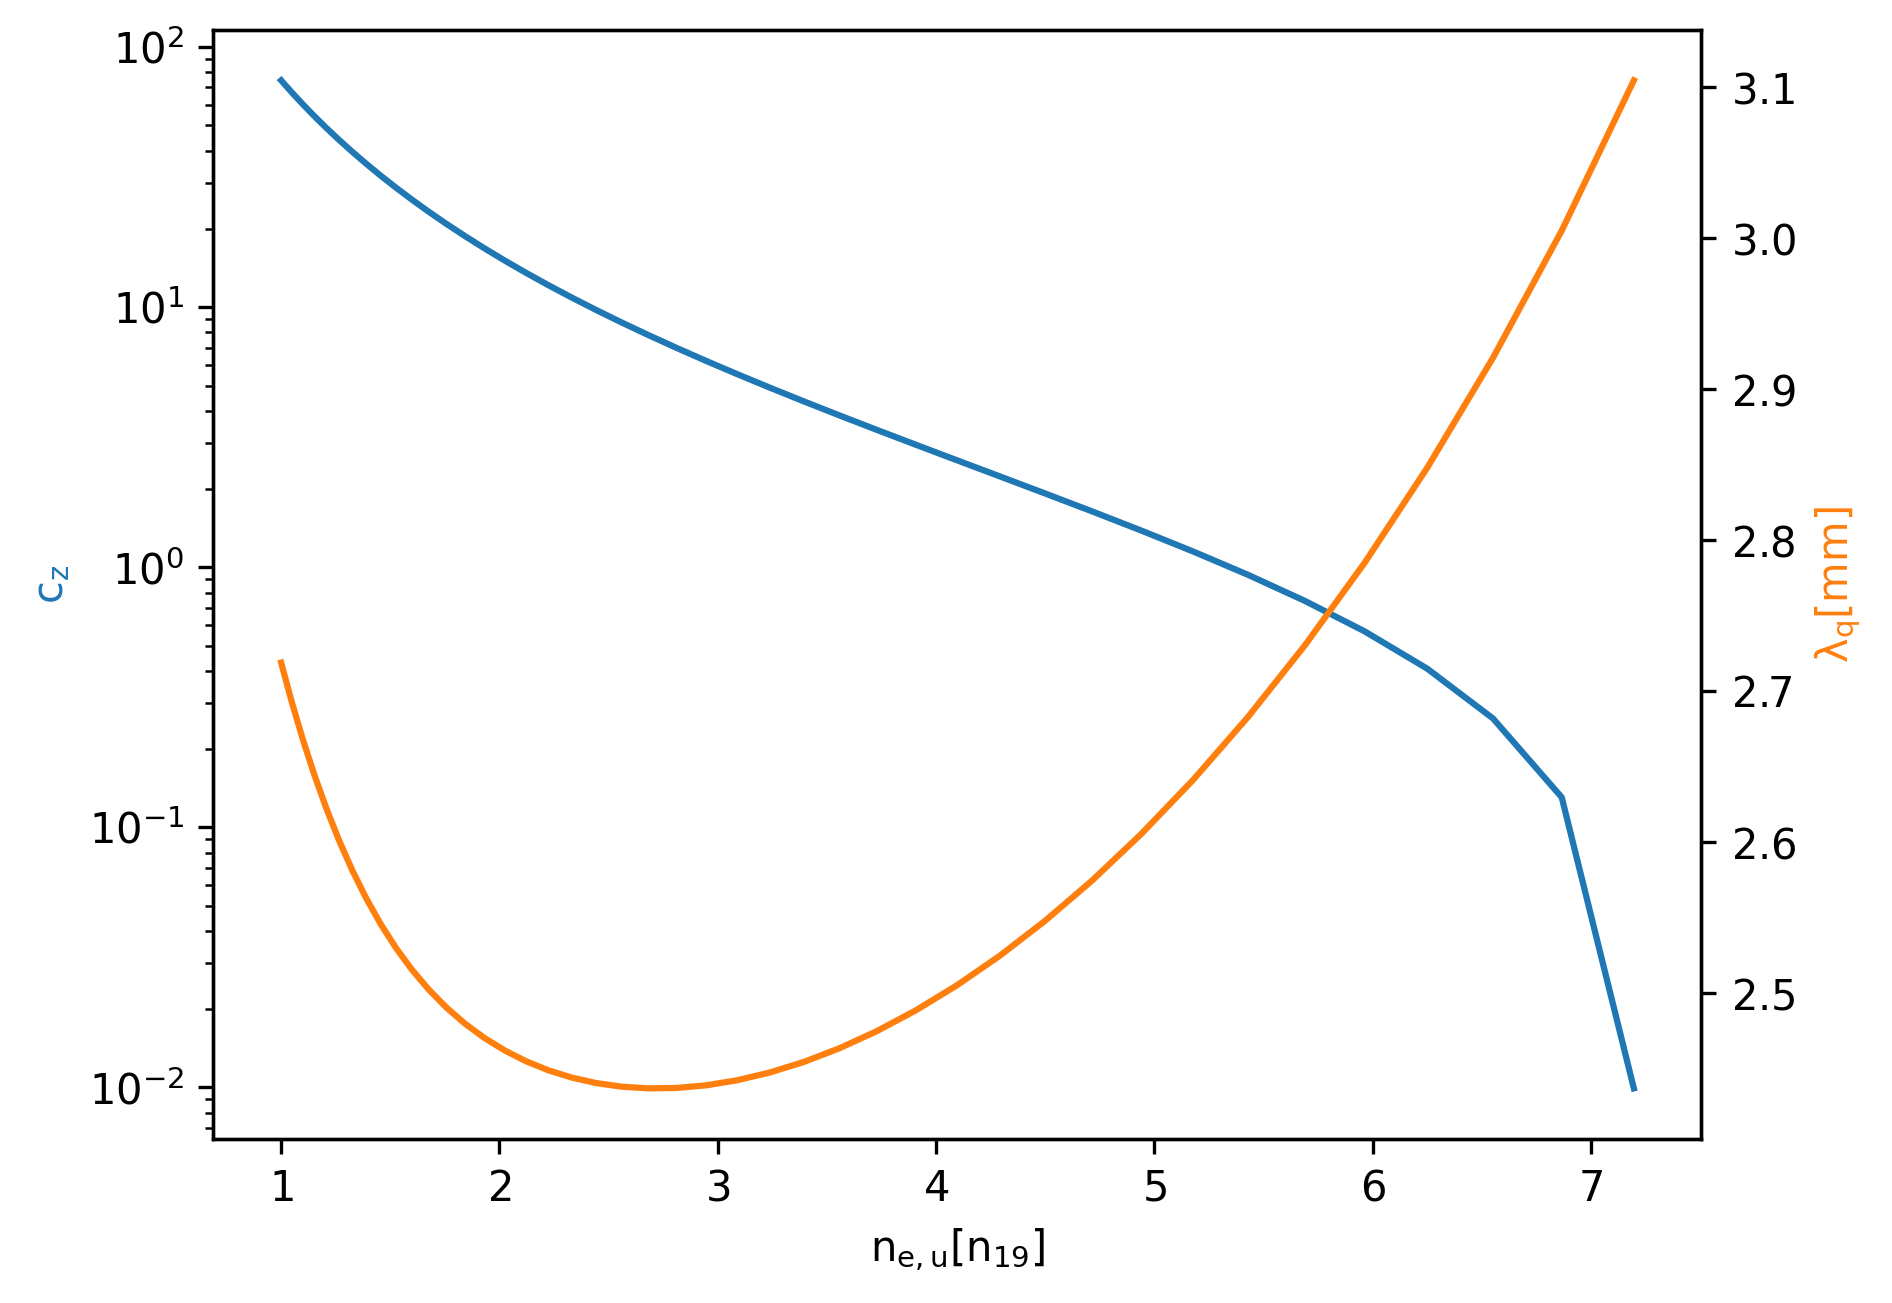

In [7]:
ds = run_lengyel_models(power_crossing_separatrix = 5.5 * ureg.MW,
                        separatrix_electron_density=extended_lengyel.promote_to_coordinate(np.logspace(np.log10(1), np.log10(10.0), num=50), ureg.n19, dims="separatrix_electron_density"),
                        model=LengyelModel.S_Zeff_fconv_and_alpha_t_correction)

fig, ax = plt.subplots()

ds["impurity_fraction"].plot(ax=ax, yscale="log")
ax.set_ylabel("$c_z$", color="C0")
ax2 = ax.twinx()

# ds["alpha_t"].where(~np.isnan(ds["impurity_fraction"])).plot(ax=ax2, color="C1")
# ax2.set_ylabel("$\\alpha_t$", color="C1")

mag(ds["lambda_q"], "mm").where(~np.isnan(ds["impurity_fraction"])).plot(ax=ax2, color="C1")
ax2.set_ylabel("$\\lambda_q [mm]$", color="C1")

ax.set_xlabel("$n_{e,u} [n_{19}]$")

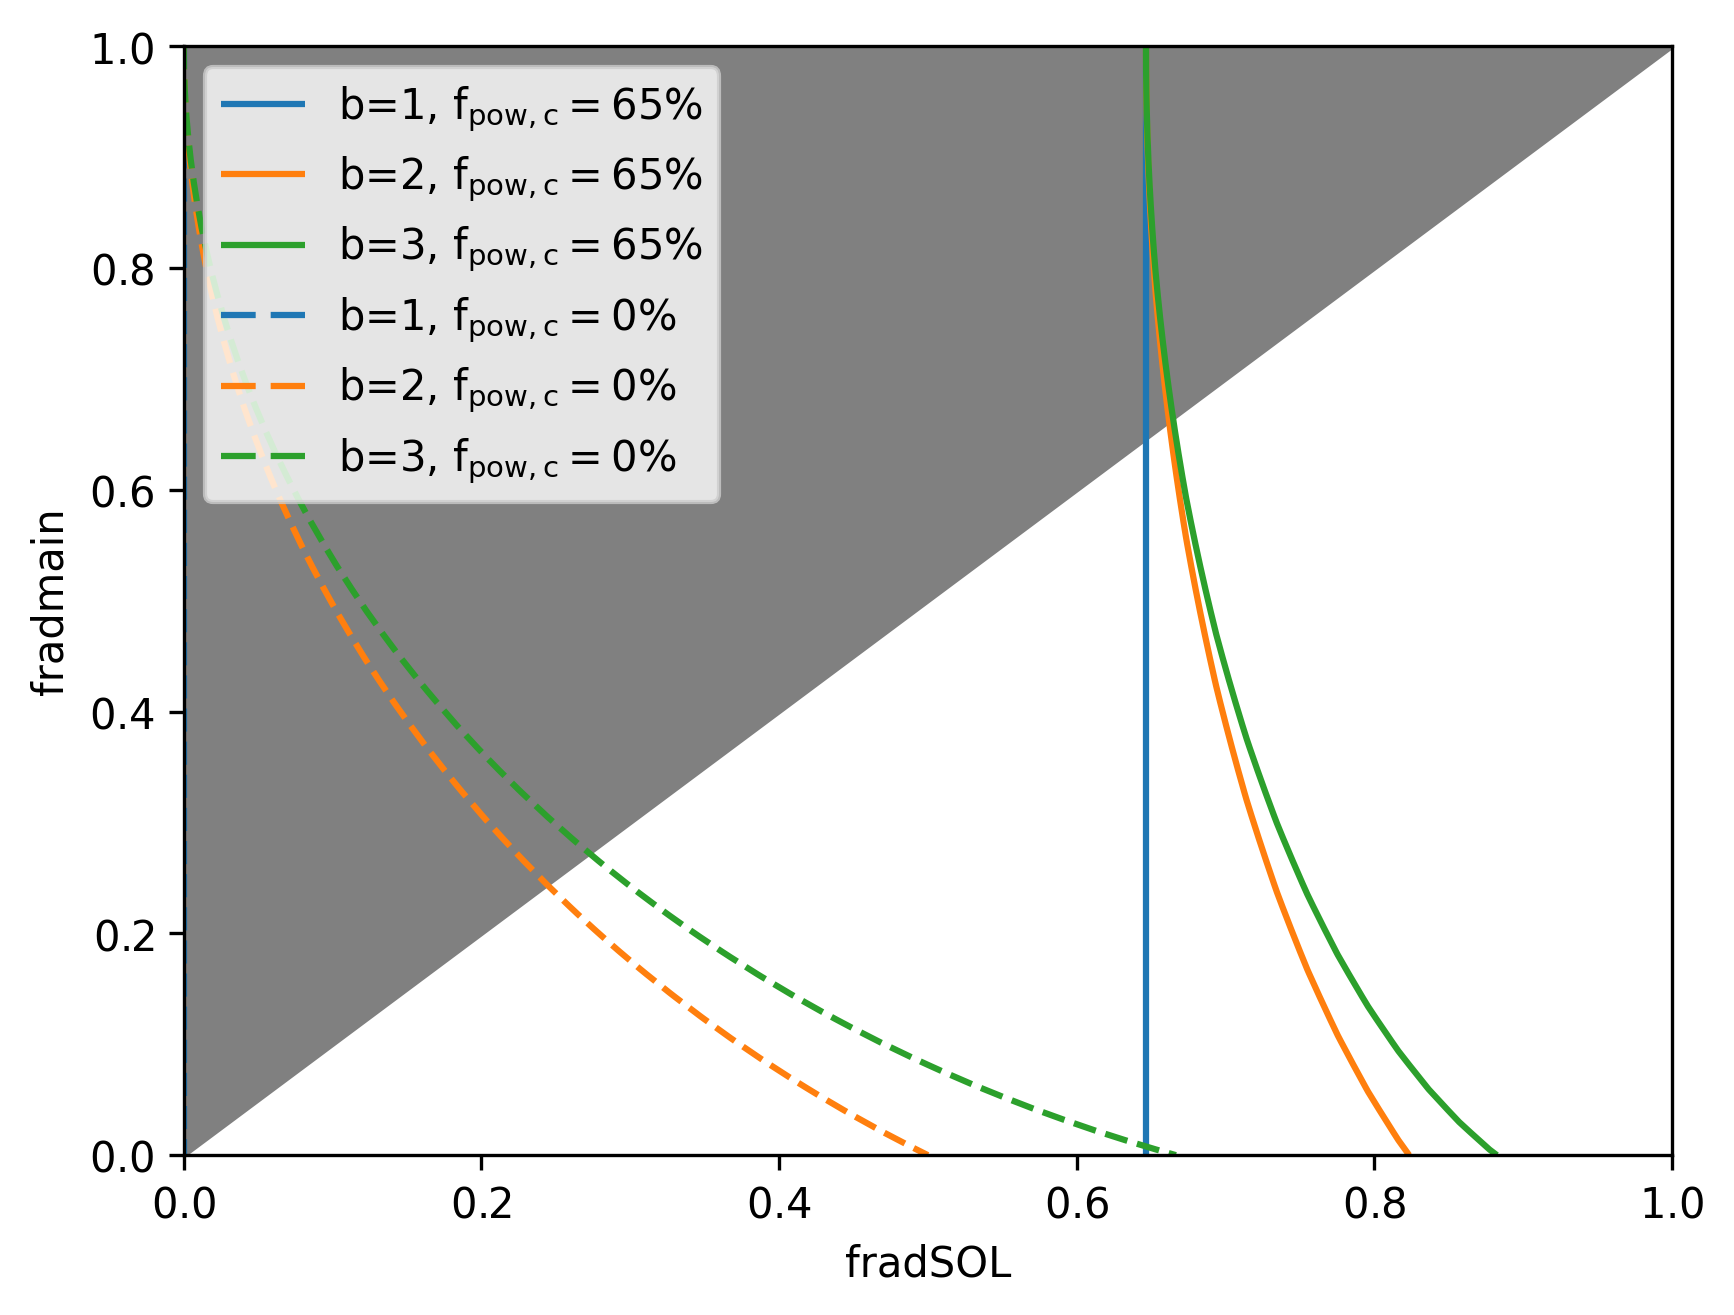

In [8]:
from extended_lengyel.extended_lengyel_model.convective_loss_fits import calc_target_electron_temp_from_cc_fit, calc_power_loss_from_cc_fit

target_electron_temp = calc_target_electron_temp_from_cc_fit(SOL_momentum_loss_fraction = 0.5)
fpowc = mag(calc_power_loss_from_cc_fit(target_electron_temp), "")

fradmain = xr.DataArray(x:=np.linspace(0, 1), coords=dict(fradmain=x))
fradSOL = xr.DataArray(x:=np.linspace(0, 1), coords=dict(fradSOL=x))

fig, ax = plt.subplots()
legend_elements = dict()

for linestyle, fpowc in zip(["-", "--"], [fpowc, 0.0]):
    for i, b in enumerate([1, 2, 3]):
        numerator = (1 + (1 / b**2 - 1)*(1-fradmain)**2 - (1-fradSOL)**2/(1-fpowc)**2)
        CS = numerator.plot.contour(levels=[0.0], colors=[f"C{i}"], linestyles=linestyle)
        legend_elements[f"b={b}, $f_{{pow,c}}={fpowc*100:.0f}\\%$"] = CS.legend_elements()[0][0]

ax.fill_between(fradmain, fradmain, 1, color="gray")
ax.legend(legend_elements.values(), legend_elements.keys())